### IMPORT STATEMENTS

In [66]:
import pandas as pd 
import collections
import os
import json
import pprint
%matplotlib inline

In [67]:
CURRENT_DIR = os.getcwd()
DATA_DIR = os.path.abspath(os.path.join(CURRENT_DIR, 'data'))
MOJO_DIR = os.path.join(DATA_DIR, 'boxofficemojo')

def get_boxofficemojo_movies():
    file_contents = os.listdir(MOJO_DIR)

    movie_list = []

    for filename in file_contents:
        filepath = os.path.join(MOJO_DIR, filename)

        with open(filepath, 'r') as movie_file:
            movie_data = json.load(movie_file)

        movie_list.append(movie_data)

    print "Parsed %i movies from %i files" % (len(movie_list),
                                              len(file_contents))
    return movie_list

if __name__ == "__main__":
    movies = get_boxofficemojo_movies()


Parsed 3728 movies from 3728 files


In [3]:

# constants
CURRENT_DIR = os.getcwd()
DATA_DIR = os.path.abspath(os.path.join(CURRENT_DIR, 'data'))
METACRIC_DIR = os.path.join(DATA_DIR, 'metacritic')

def get_metacric_movies():
    file_contents = os.listdir(METACRIC_DIR)

    movie_list = []

    for filename in file_contents:
        filepath = os.path.join(METACRIC_DIR, filename)
        with open(filepath, 'r') as movie_file:
            movie_data = json.load(movie_file)
        if isinstance(movie_data,dict):
            movie_list.append(movie_data)
    print "Parsed %i movies from %i files" % (len(movie_list),
                                              len(file_contents))
    return movie_list

if __name__ == "__main__":
    metacric = get_metacric_movies()


Parsed 4765 movies from 4767 files


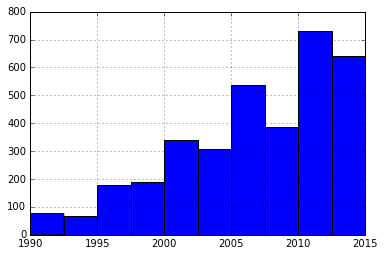

In [4]:
movies_df = pd.io.json.json_normalize(movies)

recent_movies = movies_df[movies_df['year']>=1990]

recent_movies['year'].hist()

In [38]:
metacric_df=pd.DataFrame(metacric)

In [39]:
len(metacric)

4765

In [40]:
metacric_df.head()

,complete,director,genre,metacritic_page,metascore,num_critic_reviews,num_user_ratings,num_user_reviews,rating,release_date,runtime_minutes,studio,title,unable to retrieve,user_score,year
0,True,Gil Junger,"[Comedy, Romance]",/movie/10-things-i-hate-about-you,70.0,"[18, 7, 1, 26]",175.0,"[27, 1, 1, 29]",PG-13,1999-03-31,97.0,Buena Vista Pictures,10 Things I Hate About You,NaN,7,1999
1,True,Jamie Linden,"[Drama, Comedy, Romance]",/movie/10-years,61.0,"[7, 11, 0, 18]",12.0,"[3, 2, 1, 6]",R,2012-09-14,100.0,Anchor Bay Entertainment,10 Years,NaN,6.6,2012
2,True,Roland Emmerich,"[Adventure, Drama, Fantasy]",/movie/10000-bc,34.0,"[4, 8, 17, 29]",273.0,"[50, 18, 60, 128]",PG-13,2008-03-07,109.0,Warner Bros. Pictures,"10,000 BC",NaN,4.6,2008
3,True,Stephen Herek,"[Adventure, Comedy, Family]",/movie/101-dalmatians,49.0,"[8, 9, 3, 20]",78.0,"[5, 5, 0, 10]",G,1996-11-27,103.0,Buena Vista Pictures,101 Dalmatians,NaN,5.9,1996
4,True,Kevin Lima,"[Comedy, Family]",/movie/102-dalmatians,35.0,"[7, 5, 12, 24]",47.0,"[7, 3, 3, 13]",G,2000-11-22,100.0,Buena Vista Pictures,102 Dalmatians,NaN,5.3,2000


In [41]:
frame=pd.DataFrame(metacric_df,columns=['director','title','year'])

In [16]:
metacric_df[metacric_df.duplicated(['title'])]

,complete,director,genre,metacritic_page,metascore,num_critic_reviews,num_user_ratings,num_user_reviews,rating,release_date,runtime_minutes,studio,title,unable to retrieve,user_score,year
134,True,Samuel Bayer,"[Mystery, Thriller, Horror]",/movie/a-nightmare-on-elm-street,35.0,"[2, 13, 10, 25]",210.0,"[36, 18, 37, 91]",R,2010-04-30,95.0,New Line Cinema,A Nightmare on Elm Street,NaN,5.2,2010
302,True,John Huston,"[Family, Musical]",/movie/annie,39.0,"[2, 4, 4, 10]",25.0,"[4, 1, 0, 5]",G,1982-06-18,127.0,Columbia Pictures,Annie,NaN,6.2,1982
579,True,Chris Nahon,"[Action, Thriller, Fantasy, Horror]",/movie/blood-the-last-vampire,28.0,"[1, 5, 7, 13]",17.0,"[1, 0, 3, 4]",R,2009-07-10,91.0,Sony Pictures Entertainment (SPE) Worldwide Ac...,Blood: The Last Vampire,NaN,6.1,2009
664,False,Nicolo Donato,[Drama],/movie/brotherhood,68.0,"[3, 1, 0, 4]",4.0,"[1, 0, 0, 1]",,2010-08-06,90.0,Olive Films,Brotherhood,NaN,7.3,2010
860,True,John Milius,"[Action, Adventure, Fantasy]",/movie/conan-the-barbarian,43.0,"[4, 3, 3, 10]",65.0,"[14, 2, 0, 16]",R,1982-05-14,129.0,Universal Pictures,Conan the Barbarian,NaN,8.1,1982
895,True,Paul Haggis,"[Drama, Crime]",/movie/crash,69.0,"[21, 15, 0, 36]",325.0,"[121, 6, 17, 144]",Unrated,2005-05-06,112.0,Lions Gate Films,Crash,NaN,8.1,2005
982,True,Neil LaBute,[Comedy],/movie/death-at-a-funeral,51.0,"[9, 13, 3, 25]",53.0,"[7, 4, 10, 21]",R,2010-04-16,92.0,Screen Gems,Death at a Funeral,NaN,5.1,2010
1175,True,Johnnie To,"[Drama, Thriller, Crime]",/movie/election,73.0,"[5, 1, 0, 6]",5.0,"[1, 0, 0, 1]",Unrated,2007-04-27,100.0,Tartan,Election,NaN,8,2007
1327,False,Neal Slavin,"[Drama, Romance]",/movie/focus,53.0,"[10, 15, 2, 27]",NaN,"[0, 1, 0, 1]",PG-13,2001-10-19,106.0,Paramount Classics,Focus,NaN,tbd,2001
1372,True,Marcus Nispel,[Horror],/movie/friday-the-13th,34.0,"[1, 15, 13, 29]",216.0,"[49, 20, 26, 95]",R,2009-02-13,97.0,New Line Cinema,Friday the 13th,NaN,6.3,2009


In [42]:
metacric_df1=metacric_df.drop(metacric_df.index[[4764]])

In [47]:
len(test)

0

In [43]:
metacric_df1.drop('unable to retrieve', axis=1, inplace=True)

In [44]:
metacric_df1.head()

,complete,director,genre,metacritic_page,metascore,num_critic_reviews,num_user_ratings,num_user_reviews,rating,release_date,runtime_minutes,studio,title,user_score,year
0,True,Gil Junger,"[Comedy, Romance]",/movie/10-things-i-hate-about-you,70.0,"[18, 7, 1, 26]",175.0,"[27, 1, 1, 29]",PG-13,1999-03-31,97.0,Buena Vista Pictures,10 Things I Hate About You,7,1999
1,True,Jamie Linden,"[Drama, Comedy, Romance]",/movie/10-years,61.0,"[7, 11, 0, 18]",12.0,"[3, 2, 1, 6]",R,2012-09-14,100.0,Anchor Bay Entertainment,10 Years,6.6,2012
2,True,Roland Emmerich,"[Adventure, Drama, Fantasy]",/movie/10000-bc,34.0,"[4, 8, 17, 29]",273.0,"[50, 18, 60, 128]",PG-13,2008-03-07,109.0,Warner Bros. Pictures,"10,000 BC",4.6,2008
3,True,Stephen Herek,"[Adventure, Comedy, Family]",/movie/101-dalmatians,49.0,"[8, 9, 3, 20]",78.0,"[5, 5, 0, 10]",G,1996-11-27,103.0,Buena Vista Pictures,101 Dalmatians,5.9,1996
4,True,Kevin Lima,"[Comedy, Family]",/movie/102-dalmatians,35.0,"[7, 5, 12, 24]",47.0,"[7, 3, 3, 13]",G,2000-11-22,100.0,Buena Vista Pictures,102 Dalmatians,5.3,2000


In [45]:
metacric_df2=metacric_df1.dropna(subset=[],how='any')

In [49]:
metacric_df2['title_Upper']=metacric_df2.title.str.upper()

In [51]:
metacric_df2.head()

,complete,director,genre,metacritic_page,metascore,num_critic_reviews,num_user_ratings,num_user_reviews,rating,release_date,runtime_minutes,studio,title,user_score,year,title_Upper
0,True,Gil Junger,"[Comedy, Romance]",/movie/10-things-i-hate-about-you,70.0,"[18, 7, 1, 26]",175.0,"[27, 1, 1, 29]",PG-13,1999-03-31,97.0,Buena Vista Pictures,10 Things I Hate About You,7,1999,10 THINGS I HATE ABOUT YOU
1,True,Jamie Linden,"[Drama, Comedy, Romance]",/movie/10-years,61.0,"[7, 11, 0, 18]",12.0,"[3, 2, 1, 6]",R,2012-09-14,100.0,Anchor Bay Entertainment,10 Years,6.6,2012,10 YEARS
2,True,Roland Emmerich,"[Adventure, Drama, Fantasy]",/movie/10000-bc,34.0,"[4, 8, 17, 29]",273.0,"[50, 18, 60, 128]",PG-13,2008-03-07,109.0,Warner Bros. Pictures,"10,000 BC",4.6,2008,"10,000 BC"
3,True,Stephen Herek,"[Adventure, Comedy, Family]",/movie/101-dalmatians,49.0,"[8, 9, 3, 20]",78.0,"[5, 5, 0, 10]",G,1996-11-27,103.0,Buena Vista Pictures,101 Dalmatians,5.9,1996,101 DALMATIANS
4,True,Kevin Lima,"[Comedy, Family]",/movie/102-dalmatians,35.0,"[7, 5, 12, 24]",47.0,"[7, 3, 3, 13]",G,2000-11-22,100.0,Buena Vista Pictures,102 Dalmatians,5.3,2000,102 DALMATIANS


In [52]:
metacric_df2['title']=metacric_df2.title_Upper.str.strip()

In [53]:
metacric_df2.head()

,complete,director,genre,metacritic_page,metascore,num_critic_reviews,num_user_ratings,num_user_reviews,rating,release_date,runtime_minutes,studio,title,user_score,year,title_Upper
0,True,Gil Junger,"[Comedy, Romance]",/movie/10-things-i-hate-about-you,70.0,"[18, 7, 1, 26]",175.0,"[27, 1, 1, 29]",PG-13,1999-03-31,97.0,Buena Vista Pictures,10 THINGS I HATE ABOUT YOU,7,1999,10 THINGS I HATE ABOUT YOU
1,True,Jamie Linden,"[Drama, Comedy, Romance]",/movie/10-years,61.0,"[7, 11, 0, 18]",12.0,"[3, 2, 1, 6]",R,2012-09-14,100.0,Anchor Bay Entertainment,10 YEARS,6.6,2012,10 YEARS
2,True,Roland Emmerich,"[Adventure, Drama, Fantasy]",/movie/10000-bc,34.0,"[4, 8, 17, 29]",273.0,"[50, 18, 60, 128]",PG-13,2008-03-07,109.0,Warner Bros. Pictures,"10,000 BC",4.6,2008,"10,000 BC"
3,True,Stephen Herek,"[Adventure, Comedy, Family]",/movie/101-dalmatians,49.0,"[8, 9, 3, 20]",78.0,"[5, 5, 0, 10]",G,1996-11-27,103.0,Buena Vista Pictures,101 DALMATIANS,5.9,1996,101 DALMATIANS
4,True,Kevin Lima,"[Comedy, Family]",/movie/102-dalmatians,35.0,"[7, 5, 12, 24]",47.0,"[7, 3, 3, 13]",G,2000-11-22,100.0,Buena Vista Pictures,102 DALMATIANS,5.3,2000,102 DALMATIANS


In [57]:
A=metacric_df2["title"]

In [58]:
A

0               10 THINGS I HATE ABOUT YOU
1                                 10 YEARS
2                                10,000 BC
3                           101 DALMATIANS
4                           102 DALMATIANS
5                                 11-11-11
6                               11 FLOWERS
7                                    11:14
8                                12 ROUNDS
9                         12 YEARS A SLAVE
10                               127 HOURS
11                            13 ASSASSINS
12                          13 GOING ON 30
13                                 13 SINS
14                              13 TZAMETI
15                                      13
16                                    1408
17                               16 BLOCKS
18                                17 AGAIN
19                      2 DAYS IN NEW YORK
20                         2 DAYS IN PARIS
21                        2 FAST 2 FURIOUS
22                                  2 GUNS
23         

In [65]:
import re
name_list=[]
new_title= re.sub(r'\W+','', A.str.upper)

TypeError: expected string or buffer